<a href="https://colab.research.google.com/github/t1seo/AIFFEL/blob/master/FUNDAMENTALS/15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15. 딥러닝 들여다보기

## 15-1. 들어가며

- 딥러닝 문제 구성에 대한 기본적인 이해를 높인다.
- Neural Network에 사용되는 용어들에 대한 이해를 높인다.
- 딥러닝 프레임워크를 사용하지 않고, Numpy만을 이용해 딥러닝 모델과 훈련 과정을 직접 구현해 본다.

## 15-2. 신경망 구성 (1) 개요

- **신경망(Neural Network)**
- **퍼셉트론(Perceptron)**

### MNIST Revisited

In [1]:
# Tensorflow 기반 분류
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1] * x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1] * x_test_norm.shape[2])
print(x_train_norm.shape)
print(x_train_reshaped.shape)

# 딥러닝 모델 구성 - 2 Layer Peceptron
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784, ))) # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax')) # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

(60000, 28, 28)
(60000, 784)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8813
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2306 - accuracy: 0.9344
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1813 - accuracy: 0.9479
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1510 - accuracy: 0.9572
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0

### 다층 퍼셉트론 Overview

- [What is the role of the bias in neural networks?](https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks)
- **다층 퍼셉트론(Multi-Layer Perceptron; MLP)**
- **DNN(Deep Neural Network)**
- **Fully-Connected Neural Network** -> MLP

### Parameters/Weights

In [2]:
# 입력층의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [3]:
# MLP 기반 딥러닝 모델을 Numpy로 다시 만들어본다
weight_init_std = 0.1
input_size = 784
hidden_size = 50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size) # 가우시안 표준 정규 분포에서 난수 matrix array생성

# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1 # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [4]:
# 첫 번째 데이터의 은닉층 출력을 확인
a1[0]

array([-0.40568981,  0.15020417,  0.47497495,  0.03525855,  0.53463739,
       -0.69223711, -1.02827081, -0.66427713, -0.65970925, -0.84804427,
       -1.70924481, -1.1731063 , -1.61316629, -0.03663305,  0.23086301,
        0.19410678,  0.41699383, -0.41171827, -0.19711678,  1.3274777 ,
       -0.26938213,  0.30773385,  1.52529566, -0.18763187,  0.14848796,
       -1.35574837, -0.53211084,  0.28227038, -0.44606402, -1.64236562,
        0.31380329, -0.39327461, -0.8045489 ,  0.34814073, -0.36791301,
       -0.52171896, -0.26980426,  1.69966868, -2.26197246,  0.55425936,
        1.1913375 , -0.08898262, -0.97574425,  1.40141454,  1.21526803,
       -0.4414148 ,  0.25681239,  1.50017038, -0.29444604, -1.07834535])

## 15-3. 신경망 구성 (2) 활성화 함수와 손실 함수

### 활성화 함수 (Activation Functions)

- [Why must a nonlinear activation function be used in a backpropagation neural network?](https://stackoverflow.com/questions/9782071/why-must-a-nonlinear-activation-function-be-used-in-a-backpropagation-neural-net/54503251#54503251)

### 1. sigmoid

sigmoid보다 ReLU 함수를 더 많이 사용하는 이유
- [vanishing gradient](https://brunch.co.kr/@chris-song/39) 현상이 발생한다.
- exp 함수 사용 시 비용이 크다.

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

z1 = sigmoid(a1)
print(z1[0]) # sigmoid의 출력은 모든 element가 0에서 1사이

[0.39994607 0.5374806  0.61656058 0.50881373 0.63056406 0.3335356
 0.26341948 0.33977947 0.34080493 0.29984328 0.15326169 0.23629397
 0.16614948 0.49084276 0.55746077 0.5483749  0.60276368 0.39850019
 0.45087975 0.79042311 0.43305879 0.57633202 0.82131697 0.45322917
 0.53705393 0.20493217 0.3700247  0.57010275 0.39029699 0.16214343
 0.57781333 0.40292925 0.30905331 0.58616664 0.40904541 0.37245037
 0.43295515 0.84549146 0.09432174 0.63512323 0.76698019 0.47776901
 0.27373703 0.80240826 0.77122974 0.3914039  0.56385255 0.81759989
 0.42691575 0.25381927]


### 2. Tanh
- tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결.
- **vanishing gradient** 문제 존재.

### 3. ReLU
- sigmoid, tanh 함수에 비해 학습이 빠름.
- 연산 비용이 크지 않고, 구현이 매우 간단하다.

#### 참고 자료
- [딥러닝에서 사용하는 활성화 함수](https://reniew.github.io/12/)
- [Activation Function](https://pozalabs.github.io/Activation_Function/)
- [위키독스: 비선형 활성화 함수](https://wikidocs.net/60683)

In [6]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

In [7]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2) # z1이 다시 두 번째 레이어의 입력이 된다

print(a2[0]) # 최종 출력이 output_size 만큼의 벡터가 되었다

[-0.18749483  0.52671038  0.04811686  0.69348891  0.65440072  0.63875405
  0.93367759  0.17532607  0.63499428 -0.32050926]


In [8]:
# softmax 함수
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [9]:
y_hat = softmax(a2)
y_hat[0] # 10개의 숫자 중 하나일 확률

array([0.05267469, 0.10759135, 0.06666944, 0.12711838, 0.12224541,
       0.12034756, 0.16162962, 0.07571346, 0.11989593, 0.04611418])

### 손실함수

#### 평균제곱오차(MSE: Mean Square Error)
#### 교차 엔트로피(Cross Entropy)
#### 참고 자료
- [Understanding different Loss Functions for Neural Networks.](https://towardsdatascience.com/understanding-different-loss-functions-for-neural-networks-dd1ed0274718)
- [손실함수(Loss Function)](http://www.gisdeveloper.co.kr/?p=7631)

In [10]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
print(y_hat[0])
print(t[0])

[0.05267469 0.10759135 0.06666944 0.12711838 0.12224541 0.12034756
 0.16162962 0.07571346 0.11989593 0.04611418]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
def cross_entropy_error(y, t):
    if y.ndim ==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.5852455568289363

## 15-4. 경사하강법

- [[ ML ] 모두를 위한 TensorFlow (3) Gradient descent algorithm 기본](https://medium.com/@peteryun/ml-%EB%AA%A8%EB%91%90%EB%A5%BC-%EC%9C%84%ED%95%9C-tensorflow-3-gradient-descent-algorithm-%EA%B8%B0%EB%B3%B8-c0688208fc59)
- [[머신러닝] lec 7-1 : 학습 Learning rate, Overfitting, 그리고 일반화](https://aileen93.tistory.com/71)
- [가중치 초기화 (Weight Initialization)](https://reniew.github.io/13/)
- [Classification and Loss Evaluation - Softmax and Cross Entropy Loss](https://deepnotes.io/softmax-crossentropy)

In [13]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01053494,  0.02151827,  0.01333389,  0.02542368,  0.02444908,
        -0.17593049,  0.03232592,  0.01514269,  0.02397919,  0.00922284],
       [-0.19199804,  0.01979818,  0.01417711,  0.02882605,  0.02195335,
         0.02676875,  0.0274539 ,  0.02082192,  0.02260808,  0.0095907 ],
       [ 0.00891656,  0.0184666 ,  0.0169811 ,  0.02314872, -0.17812648,
         0.02979259,  0.03064169,  0.01955448,  0.01980502,  0.01081973],
       [ 0.00945165, -0.18090059,  0.01346373,  0.02518908,  0.02206237,
         0.02750219,  0.02686516,  0.02218515,  0.0234314 ,  0.01074987],
       [ 0.00995296,  0.02164623,  0.0122209 ,  0.02263612,  0.02270527,
         0.0259472 ,  0.03043491,  0.0224797 ,  0.02229931, -0.19032261]])

In [14]:
dW2 = np.dot(z1.T, dy)
dW2

array([[-0.06358718, -0.0883621 ,  0.03074016,  0.05597507, -0.00943171,
        -0.01312346,  0.06499961,  0.04569905,  0.05049071, -0.07340016],
       [-0.00354152, -0.00809688,  0.01783798,  0.02958066, -0.06598501,
        -0.0204293 ,  0.03705108,  0.02399722,  0.02678487, -0.0371991 ],
       [-0.13953288, -0.07537005,  0.04921683,  0.08823934, -0.05636151,
         0.01185671,  0.10271765,  0.07233924,  0.07846951, -0.13157484],
       [-0.06733841, -0.00107882,  0.03537477,  0.06410259, -0.01907823,
        -0.08939943,  0.07746137,  0.05004268,  0.05810953, -0.10819604],
       [-0.1273039 , -0.04417295,  0.03813584,  0.06995668, -0.01955229,
        -0.09804377,  0.08019985,  0.05214234,  0.06168883, -0.01305063],
       [-0.09098096, -0.07797502,  0.04643734,  0.08406593, -0.02804386,
        -0.08203172,  0.09915687,  0.06621202,  0.07578346, -0.09262405],
       [-0.12778561, -0.03209086,  0.0472985 ,  0.08472446, -0.05961241,
        -0.07111219,  0.09961016,  0.06606868

In [15]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [16]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [17]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [18]:
learning_rate = 0.1 # 파라미터 업데이트하는데 learning rate 고려

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

## 15-5. 오차역전파법이란?


In [19]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [20]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.07854101 0.08583584 0.16195867 0.03628619 0.14363453 0.14344054
  0.08655567 0.13248348 0.04979976 0.08146432]
 [0.08929667 0.07754062 0.14601446 0.04120935 0.16415818 0.13229204
  0.07506148 0.13046724 0.04908107 0.0948789 ]
 [0.0741119  0.0724017  0.14967661 0.03875492 0.13515956 0.16858943
  0.08003447 0.14433994 0.05161978 0.08531168]
 [0.08529008 0.09120665 0.18317372 0.03813327 0.14060426 0.11646996
  0.0772531  0.14050043 0.04609904 0.08126948]
 [0.09147438 0.07906725 0.18298582 0.03998373 0.13211183 0.11414967
  0.08231523 0.14287568 0.04860581 0.0864306 ]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.2403931915505937


## 15-6. 모델 학습 Step-by-Step

In [21]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [22]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.10751559 0.08953856 0.12133613 0.05899732 0.1883878  0.07261783
  0.08164345 0.13325444 0.06017146 0.08653743]
 [0.1154696  0.08658154 0.11797907 0.06141441 0.14453371 0.10248901
  0.08397174 0.14921289 0.0611604  0.07718763]
 [0.12322821 0.07252239 0.11183499 0.05027784 0.18469764 0.1017306
  0.06775562 0.13777928 0.05961889 0.09055457]
 [0.10763685 0.08898321 0.09976611 0.06538768 0.18751228 0.09320573
  0.08291292 0.12495163 0.06141159 0.08823199]
 [0.10844757 0.07460602 0.13157959 0.06320404 0.16558187 0.08236353
  0.08821284 0.1332635  0.05970736 0.09303368]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.25288584731265
---------
[[0.12403336 0.10805693 0.09791501 0.05248309 0.19404796 0.09144132
  0.07043472 0.10571426 0.05341281 0.10246055]
 [0.13837199 0.10394777 0.09547357 0.05437695 0.14726454 0.12345676
  0.07220959 0.11877882 0.054120

## 15-7. 추론 과정 구현과 정확도(Accuracy) 계산

In [23]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [24]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.15631047, 0.15517733, 0.04930513, 0.03262571, 0.18684658,
       0.15661544, 0.04071253, 0.0533748 , 0.0324866 , 0.13654542])

In [25]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [26]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.15631047 0.15517733 0.04930513 0.03262571 0.18684658 0.15661544
 0.04071253 0.0533748  0.0324866  0.13654542]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.07


## 15-8. 전체 학습 사이클 수행

In [27]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [28]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.304916422295134
train acc, test acc | 0.10218333333333333, 0.101
Loss:  0.8743931164224138
train acc, test acc | 0.7884833333333333, 0.7905
Loss:  0.4243152357162353
train acc, test acc | 0.87615, 0.8826
Loss:  0.4261118386612813
train acc, test acc | 0.8974166666666666, 0.9022
Loss:  0.27563586170171583
train acc, test acc | 0.9083833333333333, 0.9098
Loss:  0.23214605122402215
train acc, test acc | 0.9149666666666667, 0.9179
Loss:  0.34510938148487214
train acc, test acc | 0.9200333333333334, 0.9233
Loss:  0.28068647988640405
train acc, test acc | 0.9239833333333334, 0.9244
Loss:  0.2778968612347907
train acc, test acc | 0.9286833333333333, 0.9296
Loss:  0.12112261164424493
train acc, test acc | 0.93165, 0.9337
Loss:  0.27210503358485244
train acc, test acc | 0.9345833333333333, 0.9355
Loss:  0.24932533219533226
train acc, test acc | 0.9376333333333333, 0.9371
Loss:  0.23033720822430495
train acc, test acc | 0.9399166666666666, 0.9394
Loss:  0.

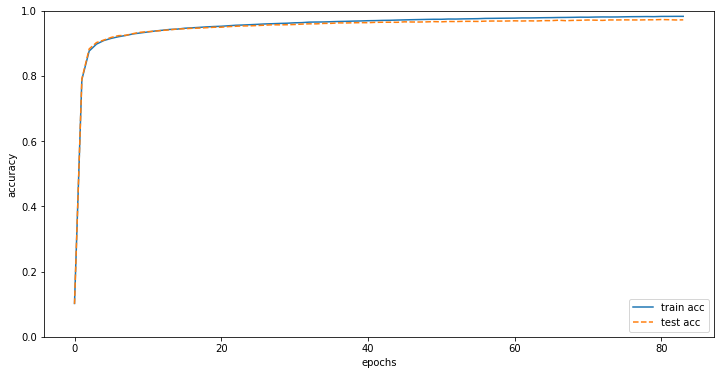

In [29]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

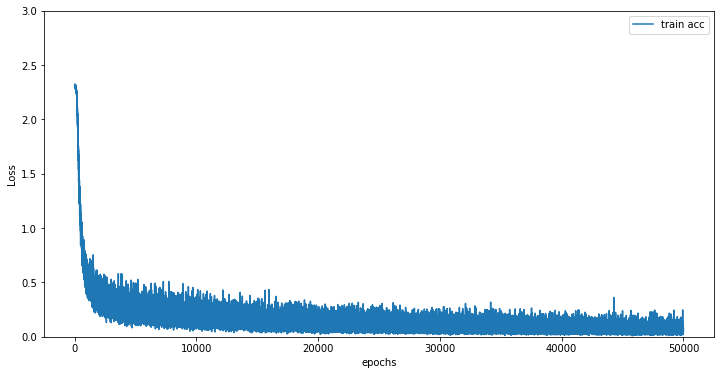

In [30]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()